In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt


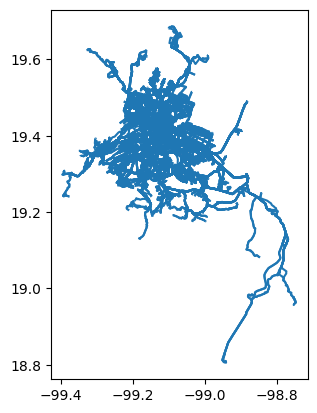

In [5]:
# cargar rutas concesionadas registradas por semovi
rutas = gpd.read_file('datos/concesionado_ruta_shp/Concesionado_Ruta.shp')


rutas.plot()

plt.show()


In [6]:
rutas.describe()

,SISTEMA,RUTA,RAMAL,DETALLE,geometry
count,995,995,995,591,995
unique,1,93,967,516,949
top,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,18,METRO BASILICA LA PRESA,.,MULTILINESTRING Z ((-99.0151633314194 19.28672...
freq,995,89,3,14,6


c:\Users\sleidenbb\.conda\envs\dataton_mm\Lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


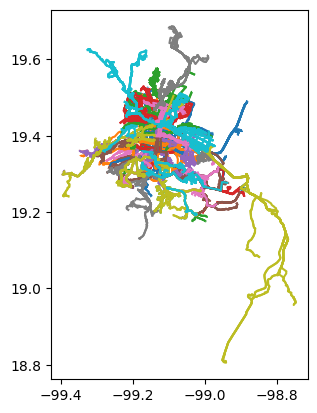

In [58]:
# graficar rutas por color

rutas.plot(column='RUTA')

plt.show()

,SISTEMA,RUTA,RAMAL,DETALLE,geometry
0,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,TENORIOS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02053 19.33196 0.00000...


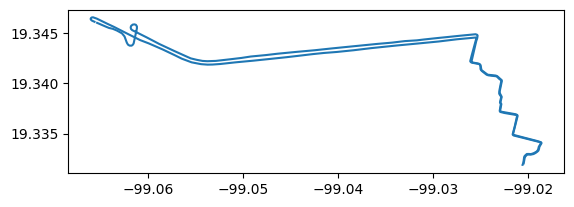

In [59]:
# graficar un ramal en específico
fila = rutas.iloc[[0]]

fila.plot()
fila

,SISTEMA,RUTA,RAMAL,DETALLE,geometry
0,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,TENORIOS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02053 19.33196 0.00000...
1,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,PALMITAS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02342 19.33128 0.00000...
238,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,MERCED - UNIDAD INFONAVIT TULYEHUALCO,NaN,"LINESTRING Z (-99.12587 19.42529 0.00000, -99...."


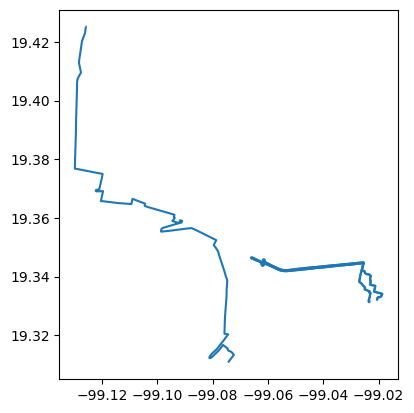

In [60]:
# graficar ramales de una ruta en específico

ruta_14=rutas[rutas["RUTA"]=="14"]
ruta_14.plot()
ruta_14

<Axes: >

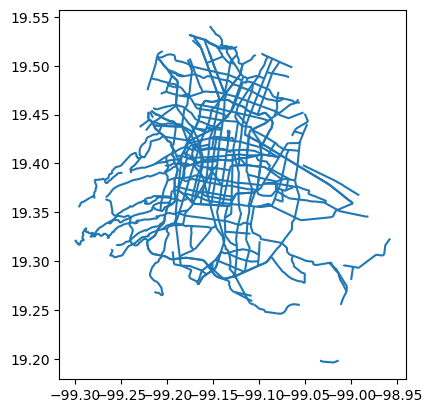

In [61]:
# importar vialidades primarias
vialidades = gpd.read_file('datos/vialidades_primarias_cdmx/vialidades_primarias_cdmx.shp')
vialidades.plot()

<Axes: >

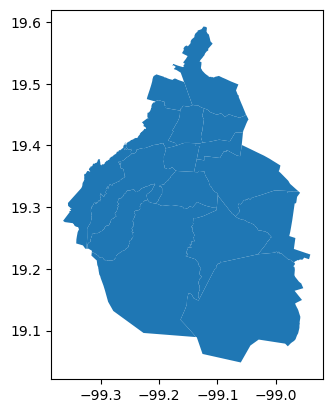

In [62]:
# alcaldias
alcaldias = gpd.read_file(r'datos\poligonos_alcaldias_cdmx\poligonos_alcaldias_cdmx.shp')
alcaldias.plot()

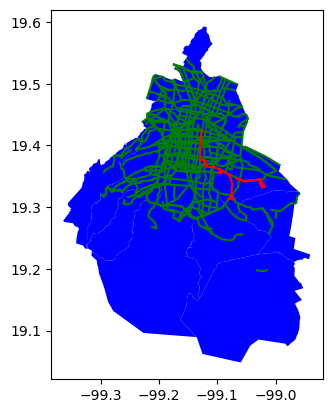

In [63]:
# sobreponer mapas

fig, ax = plt.subplots()

alcaldias.plot(ax=ax, color='blue', legend=True)
vialidades.plot(ax=ax, color='green', legend=True)
ruta_14.plot(ax=ax, color='red', legend=True)

plt.show()

In [64]:
from geopandas.tools import sjoin
# intersectar vialidades con rutas
interseccion = sjoin(ruta_14, vialidades, how="inner", predicate='intersects')
interseccion.head()

,SISTEMA,RUTA,RAMAL,DETALLE,geometry,index_right,nombre,inicia,termina,tipo_vi,vel_max
0,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,TENORIOS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02053 19.33196 0.00000...,322,Anillo Periferico Canal de Garay,Eje 4 Sur Canal de Tezontle,Av. Canal de Chalco,Via de acceso controlado,80
1,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,PALMITAS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02342 19.33128 0.00000...,322,Anillo Periferico Canal de Garay,Eje 4 Sur Canal de Tezontle,Av. Canal de Chalco,Via de acceso controlado,80
238,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,MERCED - UNIDAD INFONAVIT TULYEHUALCO,NaN,"LINESTRING Z (-99.12587 19.42529 0.00000, -99....",322,Anillo Periferico Canal de Garay,Eje 4 Sur Canal de Tezontle,Av. Canal de Chalco,Via de acceso controlado,80
0,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,TENORIOS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02053 19.33196 0.00000...,402,Eje 8 Sur Calzada Ermita Iztapalapa,Calzada de Tlalpan,Calzada Ignacio Zaragoza,Eje Vial,50
1,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,PALMITAS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02342 19.33128 0.00000...,402,Eje 8 Sur Calzada Ermita Iztapalapa,Calzada de Tlalpan,Calzada Ignacio Zaragoza,Eje Vial,50


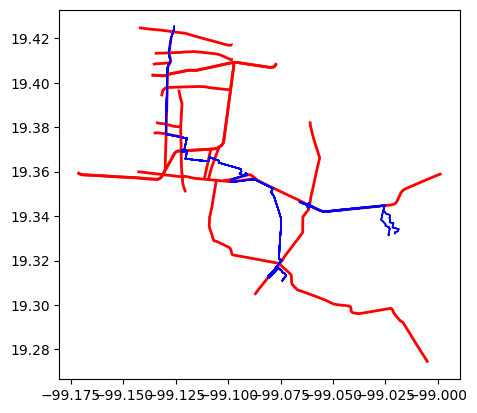

In [65]:

# encontrar vialidades por las que pasan las rutas
fig, ax = plt.subplots()

vialidades.loc[interseccion['index_right'].unique()].plot(ax=ax, linewidth=2, color='red', legend=True)

interseccion.plot(ax=ax, linewidth=1, color='blue', legend=True)

plt.show()

In [72]:
interseccion.head()

,SISTEMA,RUTA,RAMAL,DETALLE,geometry,index_right,nombre,inicia,termina,tipo_vi,vel_max
0,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,TENORIOS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02053 19.33196 0.00000...,322,Anillo Periferico Canal de Garay,Eje 4 Sur Canal de Tezontle,Av. Canal de Chalco,Via de acceso controlado,80
1,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,PALMITAS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02342 19.33128 0.00000...,322,Anillo Periferico Canal de Garay,Eje 4 Sur Canal de Tezontle,Av. Canal de Chalco,Via de acceso controlado,80
238,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,MERCED - UNIDAD INFONAVIT TULYEHUALCO,NaN,"LINESTRING Z (-99.12587 19.42529 0.00000, -99....",322,Anillo Periferico Canal de Garay,Eje 4 Sur Canal de Tezontle,Av. Canal de Chalco,Via de acceso controlado,80
0,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,TENORIOS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02053 19.33196 0.00000...,402,Eje 8 Sur Calzada Ermita Iztapalapa,Calzada de Tlalpan,Calzada Ignacio Zaragoza,Eje Vial,50
1,TRANSPORTE PÚBLICO CONCESIONADO DE RUTA,14,PALMITAS - METRO CONSTITUCIÓN,NaN,MULTILINESTRING Z ((-99.02342 19.33128 0.00000...,402,Eje 8 Sur Calzada Ermita Iztapalapa,Calzada de Tlalpan,Calzada Ignacio Zaragoza,Eje Vial,50


In [73]:
# utilizar un buffer y cálculos para hacer el reconocimiento de las vias más preciso
umbral = 0.014
resultados = []
for idx, fila in interseccion.iterrows():

    geom1 = ruta_14.loc[ruta_14.index == fila.name, 'geometry'].values[0]
    geom2 = vialidades.loc[vialidades.index == fila.index_right, 'geometry'].values[0]
    nombre_geom2 = vialidades.loc[vialidades.index == fila.index_right, 'nombre'].values[0]
    

    buffer_geom1 = geom1.buffer(0.0002)  
    interseccion_geom = buffer_geom1.intersection(geom2)
    

    porcentaje_superposicion = interseccion_geom.length / geom2.length

    if porcentaje_superposicion > umbral:
        resultados.append({'geometry_1': geom1, 'geometry_2': geom2,'nombre_2': nombre_geom2})

resultados_gdf = gpd.GeoDataFrame(resultados)

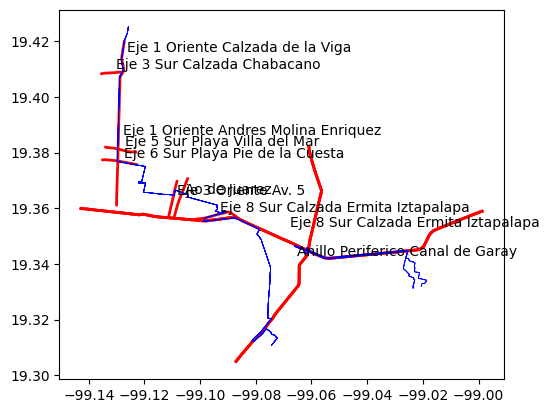

In [77]:
# graficar resultados con etiquetas de nombres de vialidades

fig, ax = plt.subplots()

resultados_gdf.set_geometry('geometry_2').plot(ax=ax, linewidth=2, color='red')

resultados_gdf.set_geometry('geometry_1').plot(ax=ax, linewidth=0.5, color='blue')

indices_unicos = resultados_gdf.drop_duplicates(subset=['geometry_2']).index

for idx in indices_unicos:
    fila = resultados_gdf.loc[idx]
    x, y = fila.geometry_2.centroid.x, fila.geometry_2.centroid.y
    ax.annotate(fila.nombre_2, xy=(x, y), xytext=(3, 3), textcoords='offset points')

plt.show()

